In [ ]:
#import the useful library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import folium
from folium.plugins import MarkerCluster

In [ ]:
#load the 'Crime_Data_from_2010_to_2019.csv' and 'Crime_Data_from_2020_to_Present.csv'
file_path_1 = 'Crime_Data_from_2010_to_2019.csv'
file_path_2 = 'Crime_Data_from_2020_to_Present.csv'

# Load CSV files into Pandas DataFrames
raw_data_1 = pd.read_csv(file_path_1)
raw_data_2 = pd.read_csv(file_path_2)

In [ ]:
# Check columns and drop irrelevant ones
print(raw_data_1.columns)
print(raw_data_2.columns)

Index(['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA ', 'AREA NAME',
       'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Crm Cd Desc', 'Mocodes',
       'Vict Age', 'Vict Sex', 'Vict Descent', 'Premis Cd', 'Premis Desc',
       'Weapon Used Cd', 'Weapon Desc', 'Status', 'Status Desc', 'Crm Cd 1',
       'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'LOCATION', 'Cross Street', 'LAT',
       'LON'],
      dtype='object')
Index(['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA', 'AREA NAME',
       'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Crm Cd Desc', 'Mocodes',
       'Vict Age', 'Vict Sex', 'Vict Descent', 'Premis Cd', 'Premis Desc',
       'Weapon Used Cd', 'Weapon Desc', 'Status', 'Status Desc', 'Crm Cd 1',
       'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'LOCATION', 'Cross Street', 'LAT',
       'LON'],
      dtype='object')


In [ ]:
# Following are the data cleaning and some basic overview of the data.
# The steps are:
# 1) select the relevant columns
# 2) rename the columns
# 3) convert the data format
# 4) drop the error data
# 5）reset the data index
# 6) basic data overview
# 7) more detailed data visualization


In [ ]:
#1) Select relevant columns

# We choose 19 labels from 28 labels.
data_1 = raw_data_1[['DATE OCC', 'TIME OCC', 'AREA ', 'AREA NAME', 'Crm Cd', 'Crm Cd Desc', 'Vict Age', 'Vict Sex', 'Vict Descent', 'Premis Cd', 'Premis Desc', 'Weapon Used Cd', 'Weapon Desc', 'Crm Cd 1',
       'Crm Cd 2', 'LOCATION', 'Cross Street', 'LAT', 'LON']]
data_2 = raw_data_2[['DATE OCC', 'TIME OCC', 'AREA', 'AREA NAME', 'Crm Cd', 'Crm Cd Desc', 'Vict Age', 'Vict Sex', 'Vict Descent', 'Premis Cd', 'Premis Desc', 'Weapon Used Cd', 'Weapon Desc', 'Crm Cd 1',
       'Crm Cd 2', 'LOCATION', 'Cross Street', 'LAT', 'LON']]

# 2) rename the columns
# Rename the 'AREA ' for data_1 to delete the space
data_1.rename(columns={'AREA ': 'AREA'}, inplace = True)
# Your original columns
columns = ['DATE OCC', 'TIME OCC', 'AREA', 'AREA NAME', 'Crm Cd', 'Crm Cd Desc', 'Vict Age', 'Vict Sex', 'Vict Descent', 'Premis Cd', 'Premis Desc', 'Weapon Used Cd', 'Weapon Desc', 'Crm Cd 1', 'Crm Cd 2', 'LOCATION', 'Cross Street', 'LAT', 'LON']

# Convert columns to uppercase
columns_upper = [col.upper().strip() for col in columns]

# Rename columns in the DataFrame
data_1.columns = columns_upper
data_2.columns = columns_upper
# Now, all column titles are in uppercase
# print(data_1.head())  # Print the first few rows to verify the changes



<ipython-input-5-5ef888c7e1fb>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_1.rename(columns={'AREA ': 'AREA'}, inplace = True)


In [ ]:
# 3) convert the data format

# Convert 'DATE OCC' to datetime format
data_1['DATE OCC'] = pd.to_datetime(data_1['DATE OCC'])

# Extract Year, Month, and Day into separate columns
data_1['YEAR'] = data_1['DATE OCC'].dt.year
data_1['MONTH'] = data_1['DATE OCC'].dt.month
data_1['DAY'] = data_1['DATE OCC'].dt.day

# Print the first few rows to verify changes
print(data_1[['DATE OCC', 'YEAR', 'MONTH', 'DAY']].head())

# Convert 'TIME OCC' to string and then to time format
data_1['TIME OCC'] = pd.to_datetime(data_1['TIME OCC'], format='%H%M', errors='coerce').dt.strftime('%H:%M')

# Print the first few rows to verify changes
print(data_1['TIME OCC'].head())


# Convert 'DATE OCC' to datetime format
data_2['DATE OCC'] = pd.to_datetime(data_2['DATE OCC'])

# Extract Year, Month, and Day into separate columns
data_2['YEAR'] = data_2['DATE OCC'].dt.year
data_2['MONTH'] = data_2['DATE OCC'].dt.month
data_2['DAY'] = data_2['DATE OCC'].dt.day

# Print the first few rows to verify changes
print(data_2[['DATE OCC', 'YEAR', 'MONTH', 'DAY']].head())

# Convert 'TIME OCC' to string and then to time format
data_2['TIME OCC'] = pd.to_datetime(data_2['TIME OCC'], format='%H%M', errors='coerce').dt.strftime('%H:%M')

# Print the first few rows to verify changes
print(data_2['TIME OCC'].head())


    DATE OCC  YEAR  MONTH  DAY
0 2010-02-20  2010      2   20
1 2010-09-12  2010      9   12
2 2010-08-09  2010      8    9
3 2010-01-05  2010      1    5
4 2010-01-02  2010      1    2


<ipython-input-6-52c1cf23c39e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_1['DATE OCC'] = pd.to_datetime(data_1['DATE OCC'])
<ipython-input-6-52c1cf23c39e>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_1['YEAR'] = data_1['DATE OCC'].dt.year
<ipython-input-6-52c1cf23c39e>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

0    13:50
1    04:05
2    15:15
3    15:00
4    21:00
Name: TIME OCC, dtype: object
    DATE OCC  YEAR  MONTH  DAY
0 2020-01-08  2020      1    8
1 2020-01-01  2020      1    1
2 2020-02-13  2020      2   13
3 2020-01-01  2020      1    1
4 2020-01-01  2020      1    1
0    22:30
1    03:30
2    12:00
3    17:30
4    04:15
Name: TIME OCC, dtype: object


<ipython-input-6-52c1cf23c39e>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2['TIME OCC'] = pd.to_datetime(data_2['TIME OCC'], format='%H%M', errors='coerce').dt.strftime('%H:%M')


In [ ]:
# 4) drop the error data

# Filter out rows where victim age is between -12 and 0
data_1 = data_1[(data_1['VICT AGE'] > 0) | (data_1['VICT AGE'].isnull())]

# Check the new victim age range after filtering
print("Updated Victim Age Range:")
print("Minimum Age:", data_1['VICT AGE'].min())
print("Maximum Age:", data_1['VICT AGE'].max())

# Filter out rows where victim age is between -12 and 0
data_2 = data_2[(data_2['VICT AGE'] > 0) | (data_2['VICT AGE'].isnull())]

# Check the new victim age range after filtering
print("Updated Victim Age Range:")
print("Minimum Age:", data_2['VICT AGE'].min())
print("Maximum Age:", data_2['VICT AGE'].max())

# There are some 2021 data in the data_1, need to drop
# Filter out rows where victim age is between -12 and 0
data_1 = data_1[(data_1['YEAR'] < 2020) | (data_1['YEAR'].isnull())]

Updated Victim Age Range:
Minimum Age: 2.0
Maximum Age: 99.0
Updated Victim Age Range:
Minimum Age: 2.0
Maximum Age: 99.0


In [ ]:
# 5）reset the data index

# Reset the data Index
data_1 = data_1.reset_index(drop=True)

data_2 = data_2.reset_index(drop=True)

# Displaying the DataFrame to check the new order
# print(data_1)

# Print all column names of data_1
print("Column names of data_1:")
print(data_1.columns.tolist())

# Print all column names of data_2
print("Column names of data_2:")
print(data_2.columns.tolist())


Column names of data_1:
['DATE OCC', 'TIME OCC', 'AREA', 'AREA NAME', 'CRM CD', 'CRM CD DESC', 'VICT AGE', 'VICT SEX', 'VICT DESCENT', 'PREMIS CD', 'PREMIS DESC', 'WEAPON USED CD', 'WEAPON DESC', 'CRM CD 1', 'CRM CD 2', 'LOCATION', 'CROSS STREET', 'LAT', 'LON', 'YEAR', 'MONTH', 'DAY']
Column names of data_2:
['DATE OCC', 'TIME OCC', 'AREA', 'AREA NAME', 'CRM CD', 'CRM CD DESC', 'VICT AGE', 'VICT SEX', 'VICT DESCENT', 'PREMIS CD', 'PREMIS DESC', 'WEAPON USED CD', 'WEAPON DESC', 'CRM CD 1', 'CRM CD 2', 'LOCATION', 'CROSS STREET', 'LAT', 'LON', 'YEAR', 'MONTH', 'DAY']


In [ ]:
'''
Here are some descritions of the data columns:

Data_1 is the pd.Frame of data before 2020.
Data_2 is the pd.Frame of data after 2020.

'YEAR' :                year of the crime happened. (e.g. 2019)
'MONTH' :               Month of the crime happened. (e.g. 3)
'DAY' :                 Day of the crime happened. (e.g. 11)
'TIME OCC' :            Exact time of the crime happened. (e.g. 10:13)

'AREA':                 The LAPD has 21 Community Police Stations referred to as Geographic Areas within the department.
                        These Geographic Areas are sequentially numbered from 1-21.
'AREA NAME':            ['Newton' 'Hollywood' 'Central' 'Southwest' 'Devonshire' 'Rampart'
                        'Olympic' 'Northeast' 'Harbor' '77th Street' 'Hollenbeck' 'Pacific'
                        'Wilshire' 'West LA' 'Southeast' 'Topanga' 'Mission' 'West Valley'
                        'Van Nuys' 'N Hollywood' 'Foothill']

'CRM CD':               Indicates the crime committed. (Same as Crime Code 1).
'CRM CD DESC':          Defines the Crime Code provided.
'CRM CD 1':             Indicates the crime committed. Crime Code 1 is the primary and most serious one.
                        Crime Code 2, 3, and 4 are respectively less serious offenses. Lower crime class numbers are more serious.
'CRM CD 2':             May contain a code for an additional crime, less serious than Crime Code 1.

'VICT AGE':             The age of the victim.
'VICT SEX':             The sex of the victim.
'VICT DESCENT':         Descent Code: A - Other Asian B - Black C - Chinese D - Cambodian F - Filipino
                        G - Guamanian H - Hispanic/Latin/Mexican I - American Indian/Alaskan Native
                        J - Japanese K - Korean L - Laotian O - Other P - Pacific Islander S - Samoan
                        U - Hawaiian V - Vietnamese W - White X - Unknown Z - Asian Indian

'PREMIS CD':            The type of structure, vehicle, or location where the crime took place.
'PREMIS DESC':          Defines the Premise Code provided.

'WEAPON USED CD':       The type of weapon used in the crime.
'WEAPON DESC':          Defines the Weapon Used Code provided.


'LOCATION':             Street address of crime incident rounded to the nearest hundred block to maintain anonymity.
'CROSS STREET':         Cross Street of rounded Address.
'LAT':                  Latitude
'LON':                  Longtitude


'''

"\nHere are some descritions of the data columns:\n\nData_1 is the pd.Frame of data before 2020.\nData_2 is the pd.Frame of data after 2020.\n\n'YEAR' :                year of the crime happened. (e.g. 2019)\n'MONTH' :               Month of the crime happened. (e.g. 3)\n'DAY' :                 Day of the crime happened. (e.g. 11)\n'TIME OCC' :            Exact time of the crime happened. (e.g. 10:13)\n\n'AREA':                 The LAPD has 21 Community Police Stations referred to as Geographic Areas within the department. \n                        These Geographic Areas are sequentially numbered from 1-21.\n'AREA NAME':            ['Newton' 'Hollywood' 'Central' 'Southwest' 'Devonshire' 'Rampart'\n                        'Olympic' 'Northeast' 'Harbor' '77th Street' 'Hollenbeck' 'Pacific'\n                        'Wilshire' 'West LA' 'Southeast' 'Topanga' 'Mission' 'West Valley'\n                        'Van Nuys' 'N Hollywood' 'Foothill']\n\n'CRM CD':               Indicates the crime

In [ ]:
# 6) basic data overview - part 1

# Output some basic information of the data

# For Data_1
print("For the crime data before the covid 19:")
print()

# How many different areas?
print("There are " + str(data_1['AREA NAME'].nunique()) + " areas")
print("The Area Name are:", data_1['AREA NAME'].unique())
print()

# How many different crime types?
print("There are " + str(data_1['CRM CD DESC'].nunique()) + " types of the crime")
print()

# What is the Vict Range
print("Victim Age Range:")
print("Minimum Age:", data_1['VICT AGE'].min())
print("Maximum Age:", data_1['VICT AGE'].max())
print()

# How many different premis types?
num_premise_types = data_1['PREMIS DESC'].nunique()
print("There are " + str(num_premise_types) + " different premise types")
print()

# How many different weapons used?
num_weapon_types = data_1['WEAPON DESC'].nunique()
print("There are " + str(num_weapon_types) + " different weapons used")
print()

# How many different Crm Cd 1 types?
num_crm_cd_1_types = data_1['CRM CD 1'].nunique()
print("There are " + str(num_crm_cd_1_types) + " different Crm Cd 1 types")


For the crime data before the covid 19:

There are 13 areas
The Area Name are: ['Newton' 'Hollywood' 'Central' 'Southwest' 'Devonshire' 'Rampart'
 'Olympic' 'Northeast' '77th Street' 'Harbor' 'Hollenbeck' 'Pacific'
 'Wilshire']

There are 95 types of the crime

Victim Age Range:
Minimum Age: 2.0
Maximum Age: 99.0

There are 124 different premise types

There are 57 different weapons used

There are 95 different Crm Cd 1 types


In [ ]:
# 6) basic data overview - part 2
# For Data_2
print("For the crime data after the covid 19:")
print()

# How many different areas?
print("There are " + str(data_2['AREA NAME'].nunique()) + " areas")
print("The Area Name are:", data_2['AREA NAME'].unique())
print()

# How many different crime types?
print("There are " + str(data_2['CRM CD DESC'].nunique()) + " types of the crime")
print()

# What is the Vict Range
print("Victim Age Range:")
print("Minimum Age:", data_2['VICT AGE'].min())
print("Maximum Age:", data_2['VICT AGE'].max())
print()

# How many different premis types?
num_premise_types = data_2['PREMIS DESC'].nunique()
print("There are " + str(num_premise_types) + " different premise types")
print()

# How many different weapons used?
num_weapon_types = data_2['WEAPON DESC'].nunique()
print("There are " + str(num_weapon_types) + " different weapons used")
print()

# How many different Crm Cd 1 types?
num_crm_cd_2_types = data_2['CRM CD 1'].nunique()
print("There are " + str(num_crm_cd_2_types) + " different Crm Cd 1 types")

For the crime data after the covid 19:

There are 21 areas
The Area Name are: ['Southwest' 'Central' 'N Hollywood' 'Mission' 'Northeast' 'Harbor'
 'Van Nuys' 'West Valley' 'West LA' 'Wilshire' 'Rampart' '77th Street'
 'Hollenbeck' 'Southeast' 'Pacific' 'Newton' 'Foothill' 'Olympic'
 'Hollywood' 'Devonshire' 'Topanga']

There are 102 types of the crime

Victim Age Range:
Minimum Age: 2.0
Maximum Age: 99.0

There are 214 different premise types

There are 55 different weapons used

There are 102 different Crm Cd 1 types


[2010 2015]


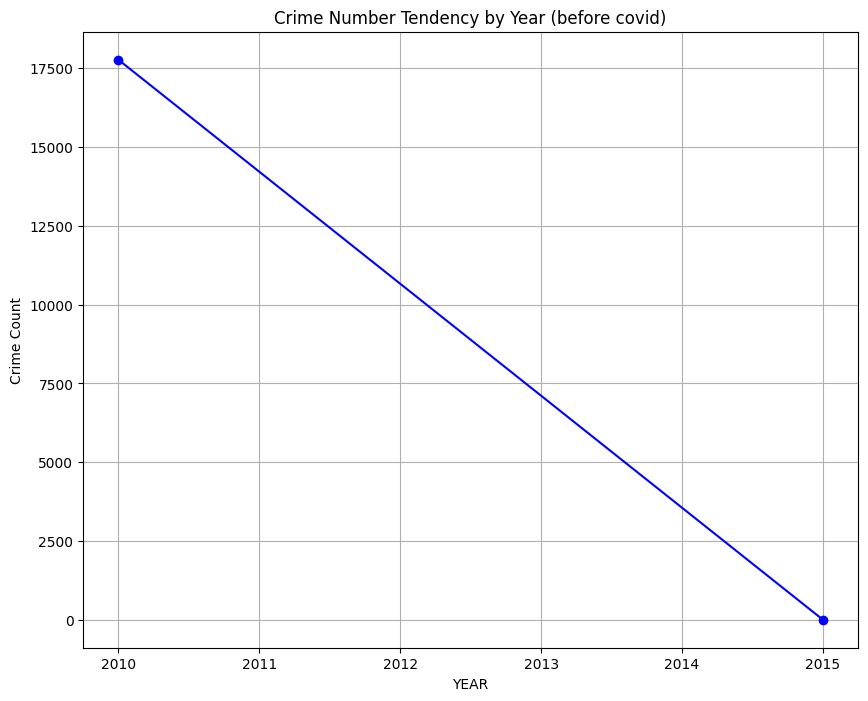

[2020]


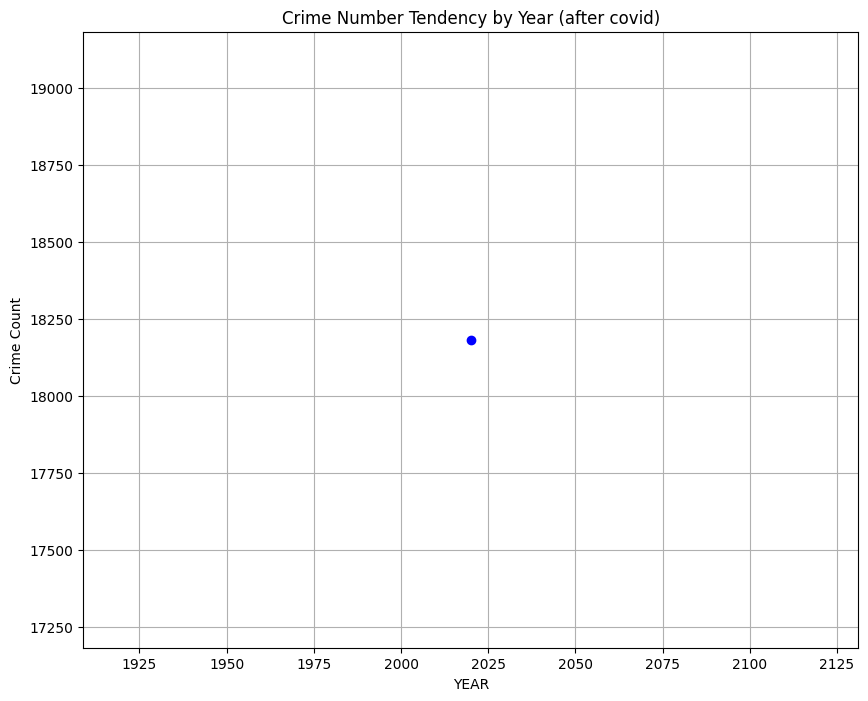

In [ ]:
# 7) more detailed data visualization - part 1

# a. the crime event number tendency for year before and after covid:
print(data_1['YEAR'].unique())
# 'Year' is the column representing the year in data_1
crime_count_by_year = data_1['YEAR'].value_counts().sort_index()

# Plotting the crime count tendency by year
plt.figure(figsize=(10, 8))
crime_count_by_year.plot(kind='line', marker='o', color='blue')
plt.title('Crime Number Tendency by Year (before covid)')
plt.xlabel('YEAR')
plt.ylabel('Crime Count')
plt.grid(True)
plt.show()

# 'Year' is the column representing the year in data_2
print(data_2['YEAR'].unique())
crime_count_by_year = data_2['YEAR'].value_counts().sort_index()

# Plotting the crime count tendency by year
plt.figure(figsize=(10, 8))
crime_count_by_year.plot(kind='line', marker='o', color='blue')
plt.title('Crime Number Tendency by Year (after covid)')
plt.xlabel('YEAR')
plt.ylabel('Crime Count')
plt.grid(True)
plt.show()


For the crime data before covid:


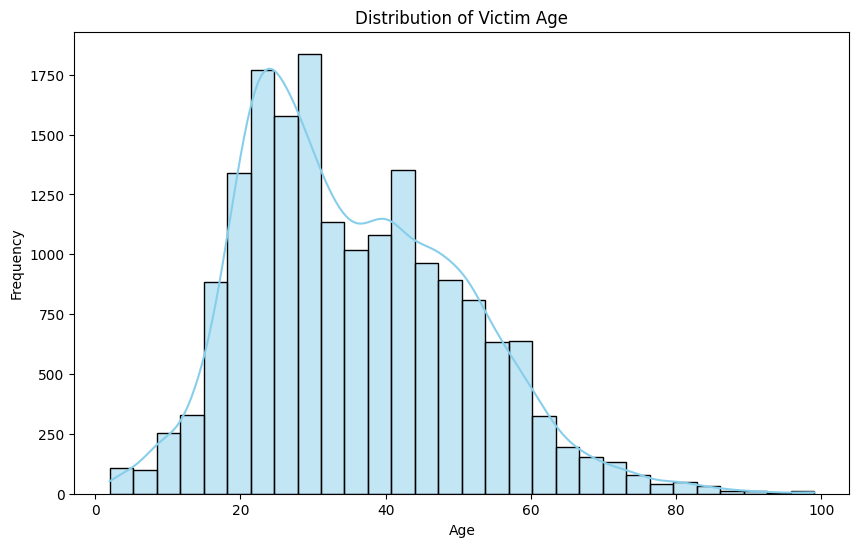

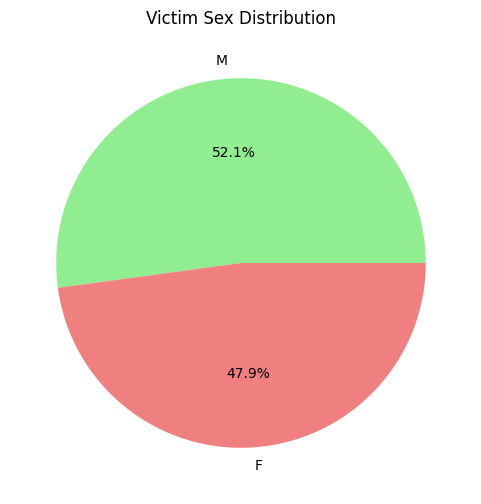

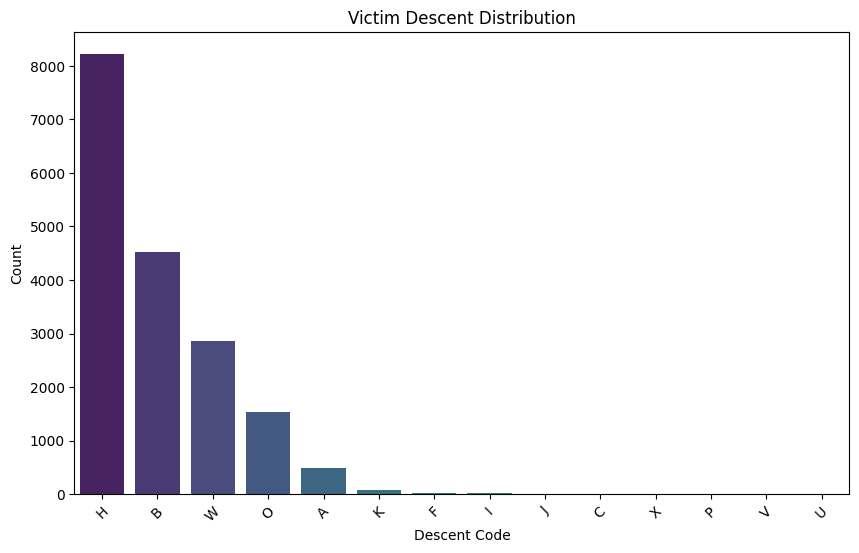

In [ ]:
# 7) more detailed data visualization - part 2
'''
'Vict Age':             The age of the victim.
'Vict Sex':             The sex of the victim.
'Vict Descent':         Descent Code: A - Other Asian B - Black C - Chinese D - Cambodian F - Filipino
                        G - Guamanian H - Hispanic/Latin/Mexican I - American Indian/Alaskan Native
                        J - Japanese K - Korean L - Laotian O - Other P - Pacific Islander S - Samoan
                        U - Hawaiian V - Vietnamese W - White X - Unknown Z - Asian Indian
'''
print("For the crime data before covid:")
# Victim's Age distribution
plt.figure(figsize=(10, 6))
sns.histplot(data_1['VICT AGE'].dropna(), bins=30, kde=True, color='skyblue')
plt.title('Distribution of Victim Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Victim's Sex distribution
plt.figure(figsize=(6, 6))
data_1['VICT SEX'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['lightgreen', 'lightcoral'])
plt.title('Victim Sex Distribution')
plt.ylabel('')
plt.show()

# Victim's Descent distribution
plt.figure(figsize=(10, 6))
descent_counts = data_1['VICT DESCENT'].value_counts()
sns.barplot(x=descent_counts.index, y=descent_counts.values, palette='viridis')
plt.title('Victim Descent Distribution')
plt.xlabel('Descent Code')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

For the crime data after covid:


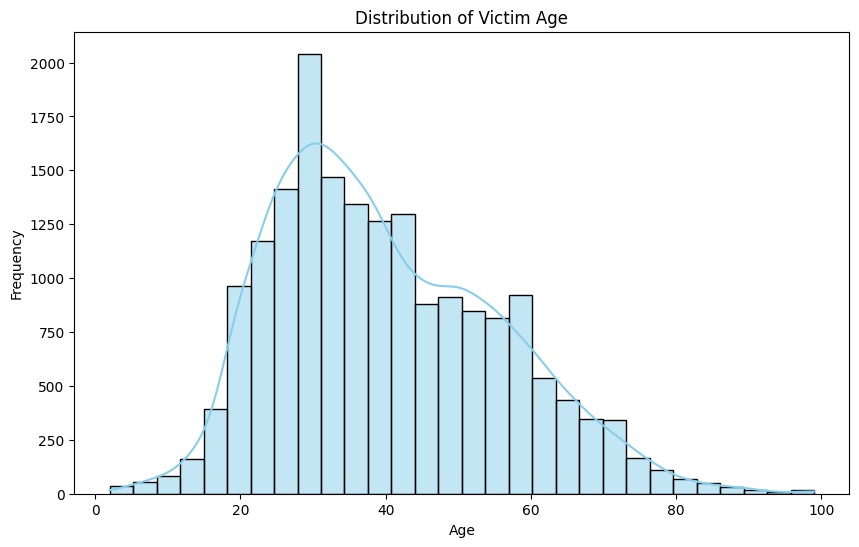

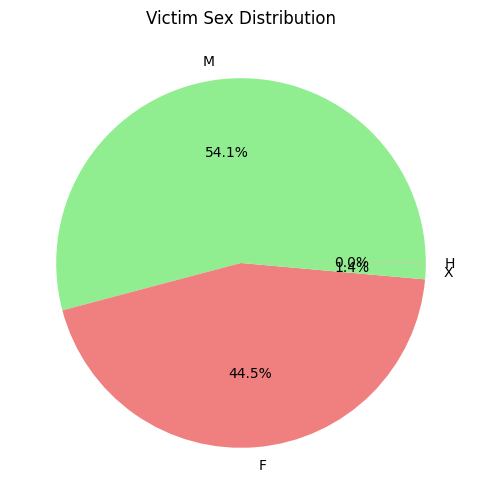

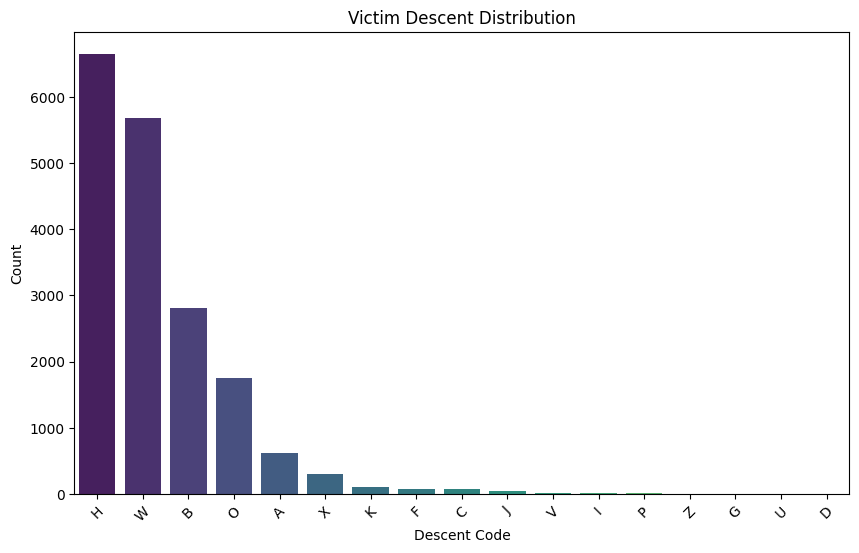

In [ ]:
# 7) more detailed data visualization - part 2
'''
'Vict Age':             The age of the victim.
'Vict Sex':             The sex of the victim.
'Vict Descent':         Descent Code: A - Other Asian B - Black C - Chinese D - Cambodian F - Filipino
                        G - Guamanian H - Hispanic/Latin/Mexican I - American Indian/Alaskan Native
                        J - Japanese K - Korean L - Laotian O - Other P - Pacific Islander S - Samoan
                        U - Hawaiian V - Vietnamese W - White X - Unknown Z - Asian Indian
'''

print("For the crime data after covid:")
# Victim's Age distribution
plt.figure(figsize=(10, 6))
sns.histplot(data_2['VICT AGE'].dropna(), bins=30, kde=True, color='skyblue')
plt.title('Distribution of Victim Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Victim's Sex distribution
plt.figure(figsize=(6, 6))
data_2['VICT SEX'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['lightgreen', 'lightcoral'])
plt.title('Victim Sex Distribution')
plt.ylabel('')
plt.show()

# Victim's Descent distribution
plt.figure(figsize=(10, 6))
descent_counts = data_2['VICT DESCENT'].value_counts()
sns.barplot(x=descent_counts.index, y=descent_counts.values, palette='viridis')
plt.title('Victim Descent Distribution')
plt.xlabel('Descent Code')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

For the crime data before covid:


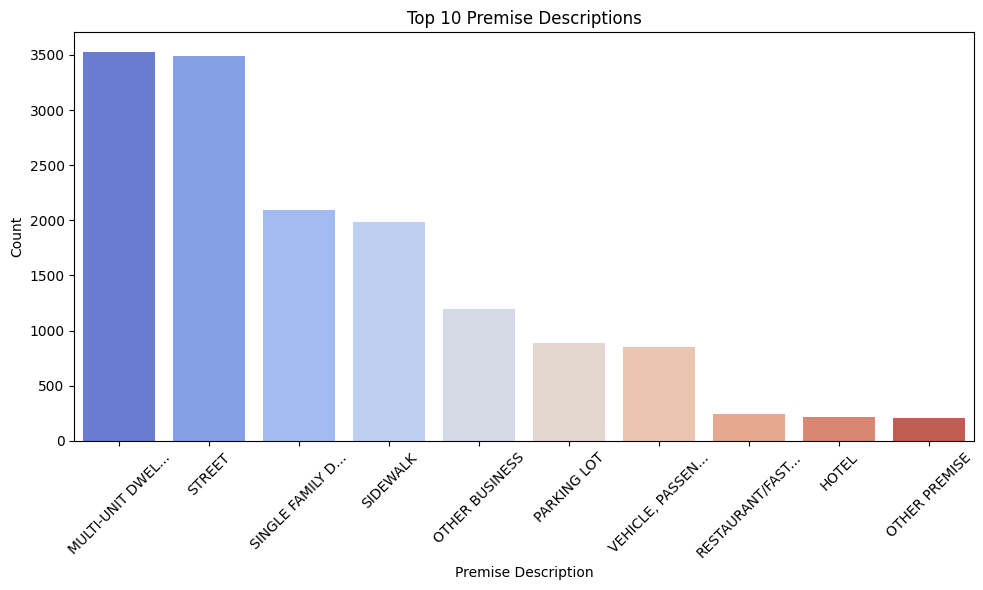

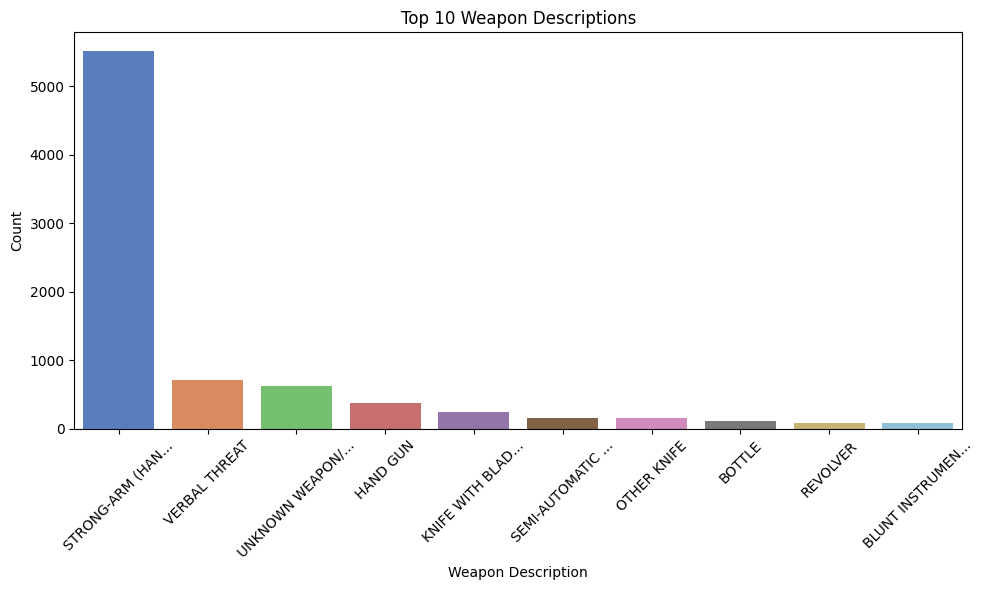

In [ ]:
# 7) more detailed data visualization - part 3
'''
'Premis Cd':            The type of structure, vehicle, or location where the crime took place.
'Premis Desc':          Defines the Premise Code provided.

'Weapon Used Cd':       The type of weapon used in the crime.
'Weapon Desc':          Defines the Weapon Used Code provided.

'''
print("For the crime data before covid:")

# Plotting Premise Description distribution
plt.figure(figsize=(10, 6))
premis_counts = data_1['PREMIS DESC'].value_counts()
shortened_labels = [label[:15] + '...' if len(label) > 15 else label for label in premis_counts.index[:10]]
sns.barplot(x=shortened_labels, y=premis_counts.values[:10], palette='coolwarm')
plt.title('Top 10 Premise Descriptions')
plt.xlabel('Premise Description')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plotting Weapon Description distribution
plt.figure(figsize=(10, 6))
weapon_counts = data_1['WEAPON DESC'].value_counts()
shortened_labels = [label[:15] + '...' if len(label) > 15 else label for label in weapon_counts.index[:10]]
sns.barplot(x=shortened_labels, y=weapon_counts.values[:10], palette='muted')
plt.title('Top 10 Weapon Descriptions')
plt.xlabel('Weapon Description')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

For the crime data after covid:


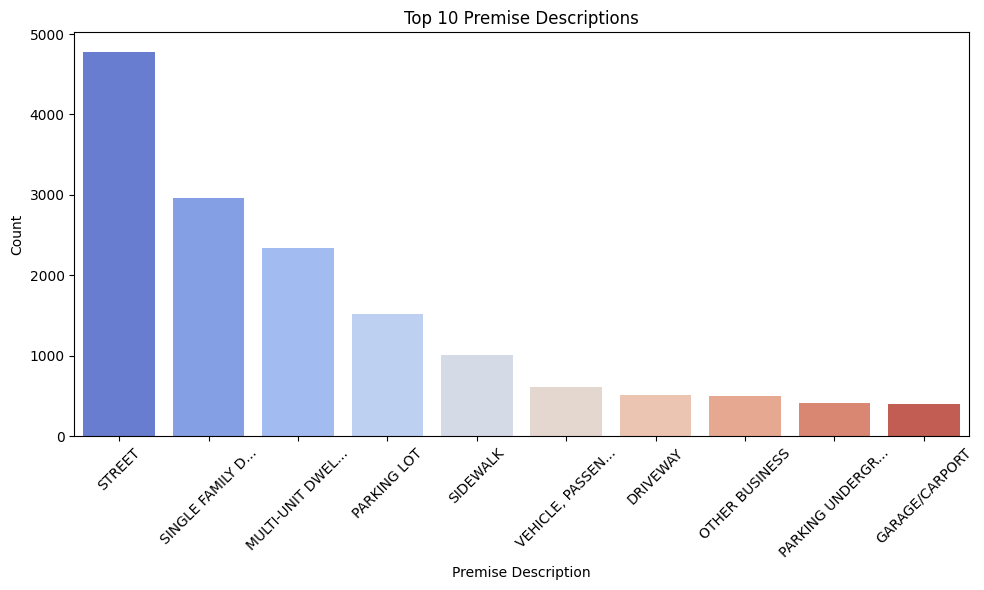

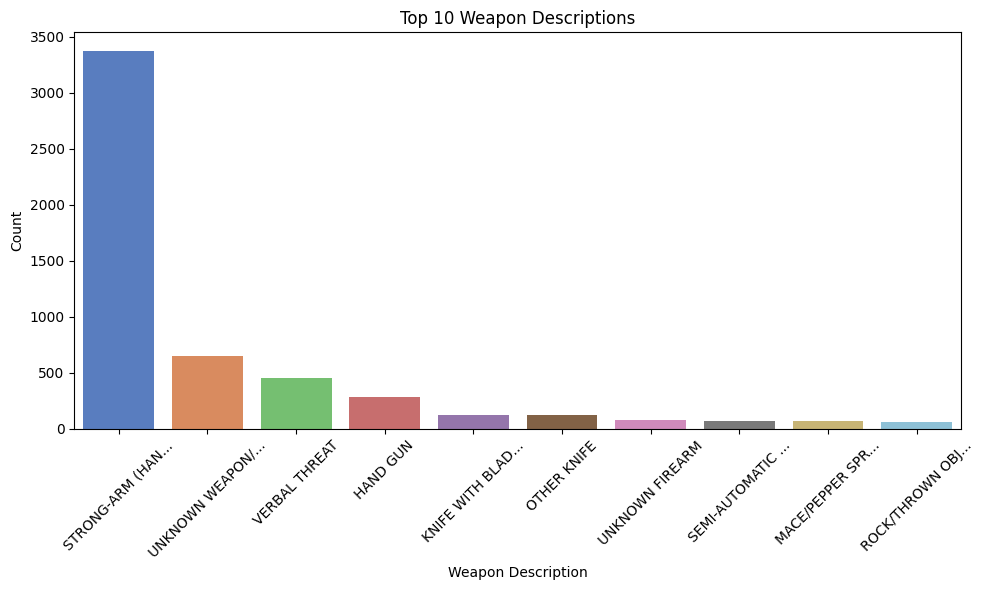

In [ ]:
# 7) more detailed data visualization - part 3
'''
'Premis Cd':            The type of structure, vehicle, or location where the crime took place.
'Premis Desc':          Defines the Premise Code provided.

'Weapon Used Cd':       The type of weapon used in the crime.
'Weapon Desc':          Defines the Weapon Used Code provided.

'''
print("For the crime data after covid:")

# Plotting Premise Description distribution
plt.figure(figsize=(10, 6))
premis_counts = data_2['PREMIS DESC'].value_counts()
shortened_labels = [label[:15] + '...' if len(label) > 15 else label for label in premis_counts.index[:10]]
sns.barplot(x=shortened_labels, y=premis_counts.values[:10], palette='coolwarm')
plt.title('Top 10 Premise Descriptions')
plt.xlabel('Premise Description')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plotting Weapon Description distribution
plt.figure(figsize=(10, 6))
weapon_counts = data_2['WEAPON DESC'].value_counts()
shortened_labels = [label[:15] + '...' if len(label) > 15 else label for label in weapon_counts.index[:10]]
sns.barplot(x=shortened_labels, y=weapon_counts.values[:10], palette='muted')
plt.title('Top 10 Weapon Descriptions')
plt.xlabel('Weapon Description')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# 7) more detailed data visualization - part 4
print("For the crime data before covid:")
# Filter data for criminal homicides and remove entries with latitude or longitude as 0
homicides = data_1[data_1['CRM CD DESC'] == 'CRIMINAL HOMICIDE']
homicides = homicides[(homicides['LAT'] != 0) & (homicides['LON'] != 0)]

# Create a base map centered at a specific location (Los Angeles coordinates as an example)
m = folium.Map(location=[34.052235, -118.243683], zoom_start=12)

# Add markers for each homicide location
marker_cluster = MarkerCluster().add_to(m)

for index, row in homicides.iterrows():
    folium.Marker(
        location=[row['LAT'], row['LON']],
        popup=row['CRM CD DESC'],
        icon=None  # You can customize the icon here if needed
    ).add_to(marker_cluster)

# Display the map
m

For the crime data before covid:


In [ ]:
# 7) more detailed data visualization - part 4
print("For the crime data before covid:")
# Filter data for criminal homicides and remove entries with latitude or longitude as 0
homicides = data_2[data_2['CRM CD DESC'] == 'CRIMINAL HOMICIDE']
homicides = homicides[(homicides['LAT'] != 0) & (homicides['LON'] != 0)]

# Create a base map centered at a specific location (Los Angeles coordinates as an example)
m = folium.Map(location=[34.052235, -118.243683], zoom_start=12)

# Add markers for each homicide location
marker_cluster = MarkerCluster().add_to(m)

for index, row in homicides.iterrows():
    folium.Marker(
        location=[row['LAT'], row['LON']],
        popup=row['CRM CD DESC'],
        icon=None  # You can customize the icon here if needed
    ).add_to(marker_cluster)

# Display the map
m

For the crime data before covid:


In [ ]:
data_1.columns

Index(['DATE OCC', 'TIME OCC', 'AREA', 'AREA NAME', 'CRM CD', 'CRM CD DESC',
       'VICT AGE', 'VICT SEX', 'VICT DESCENT', 'PREMIS CD', 'PREMIS DESC',
       'WEAPON USED CD', 'WEAPON DESC', 'CRM CD 1', 'CRM CD 2', 'LOCATION',
       'CROSS STREET', 'LAT', 'LON', 'YEAR', 'MONTH', 'DAY'],
      dtype='object')

In [ ]:
data_1['CRM CD DESC'].unique()

array(['VIOLATION OF COURT ORDER', 'RAPE, ATTEMPTED',
       'SHOPLIFTING - PETTY THEFT ($950 & UNDER)',
       'BURGLARY FROM VEHICLE',
       'ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT',
       'THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LIVESTK,PROD',
       'BATTERY - SIMPLE ASSAULT', 'ROBBERY',
       'VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)',
       'BOMB SCARE', 'OTHER MISCELLANEOUS CRIME',
       'CHILD NEGLECT (SEE 300 W.I.C.)',
       'INTIMATE PARTNER - AGGRAVATED ASSAULT',
       'INTIMATE PARTNER - SIMPLE ASSAULT',
       'THEFT PLAIN - PETTY ($950 & UNDER)',
       'CRIMINAL THREATS - NO WEAPON DISPLAYED', 'ATTEMPTED ROBBERY',
       'VANDALISM - MISDEAMEANOR ($399 OR UNDER)', 'BURGLARY',
       'RAPE, FORCIBLE', 'BRANDISH WEAPON',
       'THROWING OBJECT AT MOVING VEHICLE',
       'SHOPLIFTING-GRAND THEFT ($950.01 & OVER)',
       'CHILD ABUSE (PHYSICAL) - SIMPLE ASSAULT',
       'SHOTS FIRED AT INHABITED DWELLING', 'VEHICLE - STOLEN',
       'KIDNA

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import numpy as np
def plot_word_plots_data_1(column_name):
  '''This function plots word plots for given dataframe columns
  param- text: converts values in colums to a string
  '''
  assert isinstance(column_name,str)
  text = " ".join(cat.split()[0] for cat in data_1[column_name])
  word_cloud = WordCloud(collocations = False, background_color = 'white').generate(text)

  plt.imshow(word_cloud, interpolation='bilinear')
  plt.axis("off")
  plt.show()


def plot_gender_ratio_data_1(crime):
  "This function plots the gender ratio for a particular crime for data_1"
  gk=data_1.groupby(['CRM CD DESC'])
  jk=gk.get_group(crime).groupby(['VICT SEX']).count()
  fig = plt.figure()
  langs = ['Female','Male']
  students = [jk['DATE OCC'][0], jk['DATE OCC'][1]]
  ax = fig.add_axes([0,0,0.2,0.5])
  ax.bar(langs,students)
  plt.show()

def return_avg_age_data_1(crime):
  '''This function returns the average age of the victims'''
  gk=data_1.groupby(['CRM CD DESC'])
  jk=int(gk.get_group(crime)['VICT AGE'].mean())



def plot_weapons_use_data_1(crime):
  '''This function plots the weapons used in the crime'''
  fk=data_1.groupby(['CRM CD DESC']).get_group(crime)
  sk=fk['WEAPON DESC']
  unique_values, counts = np.unique(sk, return_counts=True)
  plt.figure(figsize=(20, 3))
  plt.xticks(rotation=25)
  plt.bar(unique_values, counts, width=0.4)


def plot_frequency_in_area_data_1(crime):
  '''This function plots the number of times a crime has occured in the particular area'''
  fk=data_1.groupby(['CRM CD DESC']).get_group(crime)
  sk=fk['AREA NAME']
  unique_values, counts = np.unique(sk, return_counts=True)
  plt.figure(figsize=(3, 3))
  plt.xticks(rotation=25)
  plt.bar(unique_values, counts, width=0.4)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import numpy as np
def plot_word_plots_data_2(column_name):
  '''This function plots word plots for given dataframe columns
  param- text: converts values in colums to a string
  '''
  assert isinstance(column_name,str)
  text = " ".join(cat.split()[0] for cat in data_2[column_name])
  word_cloud = WordCloud(collocations = False, background_color = 'white').generate(text)

  plt.imshow(word_cloud, interpolation='bilinear')
  plt.axis("off")
  plt.show()


def plot_gender_ratio_data_2(crime):
  "This function plots the gender ratio for a particular crime for data_2"
  gk=data_2.groupby(['CRM CD DESC'])
  jk=gk.get_group(crime).groupby(['VICT SEX']).count()
  fig = plt.figure()
  langs = ['Female','Male']
  students = [jk['DATE OCC'][0], jk['DATE OCC'][1]]
  ax = fig.add_axes([0,0,0.2,0.5])
  ax.bar(langs,students)
  plt.show()

def return_avg_age_data_2(crime):
  '''This function returns the average age of the victims'''
  gk=data_2.groupby(['CRM CD DESC'])
  jk=int(gk.get_group(crime)['VICT AGE'].mean())



def plot_weapons_use_data_2(crime):
  '''This function plots the weapons used in the crime'''
  fk=data_2.groupby(['CRM CD DESC']).get_group(crime)
  sk=fk['WEAPON DESC']
  unique_values, counts = np.unique(sk, return_counts=True)
  plt.figure(figsize=(20, 3))
  plt.xticks(rotation=25)
  plt.bar(unique_values, counts, width=0.4)


def plot_frequency_in_area_data_2(crime):
  '''This function plots the number of times a crime has occured in the particular area'''
  fk=data_2.groupby(['CRM CD DESC']).get_group(crime)
  sk=fk['AREA NAME']
  unique_values, counts = np.unique(sk, return_counts=True)
  plt.figure(figsize=(3, 3))
  plt.xticks(rotation=25)
  plt.bar(unique_values, counts, width=0.4)

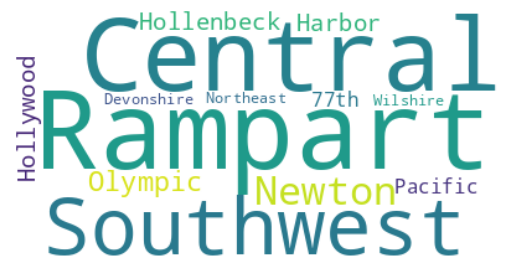

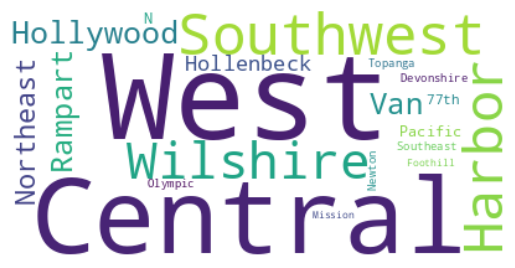

In [ ]:
plot_word_plots_data_1('AREA NAME')
plot_word_plots_data_2('AREA NAME')

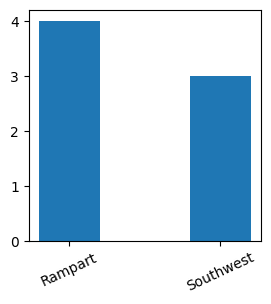

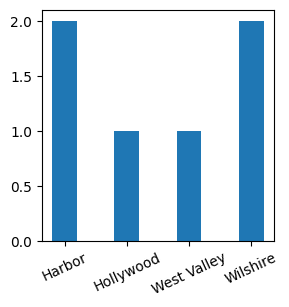

In [ ]:
plot_frequency_in_area_data_1('CHILD STEALING')
plot_frequency_in_area_data_2('CHILD STEALING')